In [1]:
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cols = ['ID', 'Diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension',
        'radius_SE', 'texture_SE', 'perimeter_SE', 'area_SE', 'smoothness_SE', 'compactness_SE', 'concavity_SE', 'concave_points_SE', 'symmetry_SE', 'fractal_dimension_SE',
        'radius_MAX', 'texture_MAX', 'perimeter_MAX', 'area_MAX', 'smoothness_MAX', 'compactness_MAX', 'concavity_MAX', 'concave_points_MAX', 'symmetry_MAX', 'fractal_dimension_MAX']
df = pd.read_csv('../../../Wisconsin_Database/wdbc.data', header=None)
df.columns = cols
df['Diagnosis'] = df['Diagnosis'].map(
                   {'M':1 ,'B':0})
print(df.shape)

(569, 32)


In [3]:
arr2D = df.to_numpy()
columnIndex = 1
sortedArr = arr2D[arr2D[:,columnIndex].argsort()]
numZeros = list(sortedArr[:, 1]).count(0)
benignDF, malignantDF = pd.DataFrame(sortedArr[0:numZeros]), pd.DataFrame(sortedArr[numZeros:])
benignDF.columns = cols
malignantDF.columns = cols


In [4]:
for i in benignDF[cols[2:]]:
    print('-'*40)
    print('Column: {}'.format(i))
    print(' Bening - Min: {}, Max: {}, Mean: {:.02f}, Std Dev: {:.02f}'.format(min(benignDF[i]), max(benignDF[i]), sum(benignDF[i])/len(benignDF[i]), np.std(benignDF[i])))
    print(' Malignant - Min: {}, Max: {}, Mean: {:.02f}, Std Dev: {:.02f}'.format(min(malignantDF[i]), max(malignantDF[i]), sum(malignantDF[i])/len(malignantDF[i]), np.std(malignantDF[i])))

----------------------------------------
Column: radius
 Bening - Min: 6.981, Max: 17.85, Mean: 12.15, Std Dev: 1.78
 Malignant - Min: 10.95, Max: 28.11, Mean: 17.46, Std Dev: 3.20
----------------------------------------
Column: texture
 Bening - Min: 9.71, Max: 33.81, Mean: 17.91, Std Dev: 3.99
 Malignant - Min: 10.38, Max: 39.28, Mean: 21.60, Std Dev: 3.77
----------------------------------------
Column: perimeter
 Bening - Min: 43.79, Max: 114.6, Mean: 78.08, Std Dev: 11.79
 Malignant - Min: 71.9, Max: 188.5, Mean: 115.37, Std Dev: 21.80
----------------------------------------
Column: area
 Bening - Min: 143.5, Max: 992.1, Mean: 462.79, Std Dev: 134.10
 Malignant - Min: 361.6, Max: 2501.0, Mean: 978.38, Std Dev: 367.07
----------------------------------------
Column: smoothness
 Bening - Min: 0.05263, Max: 0.1634, Mean: 0.09, Std Dev: 0.01
 Malignant - Min: 0.07371, Max: 0.1447, Mean: 0.10, Std Dev: 0.01
----------------------------------------
Column: compactness
 Bening - Min: 0

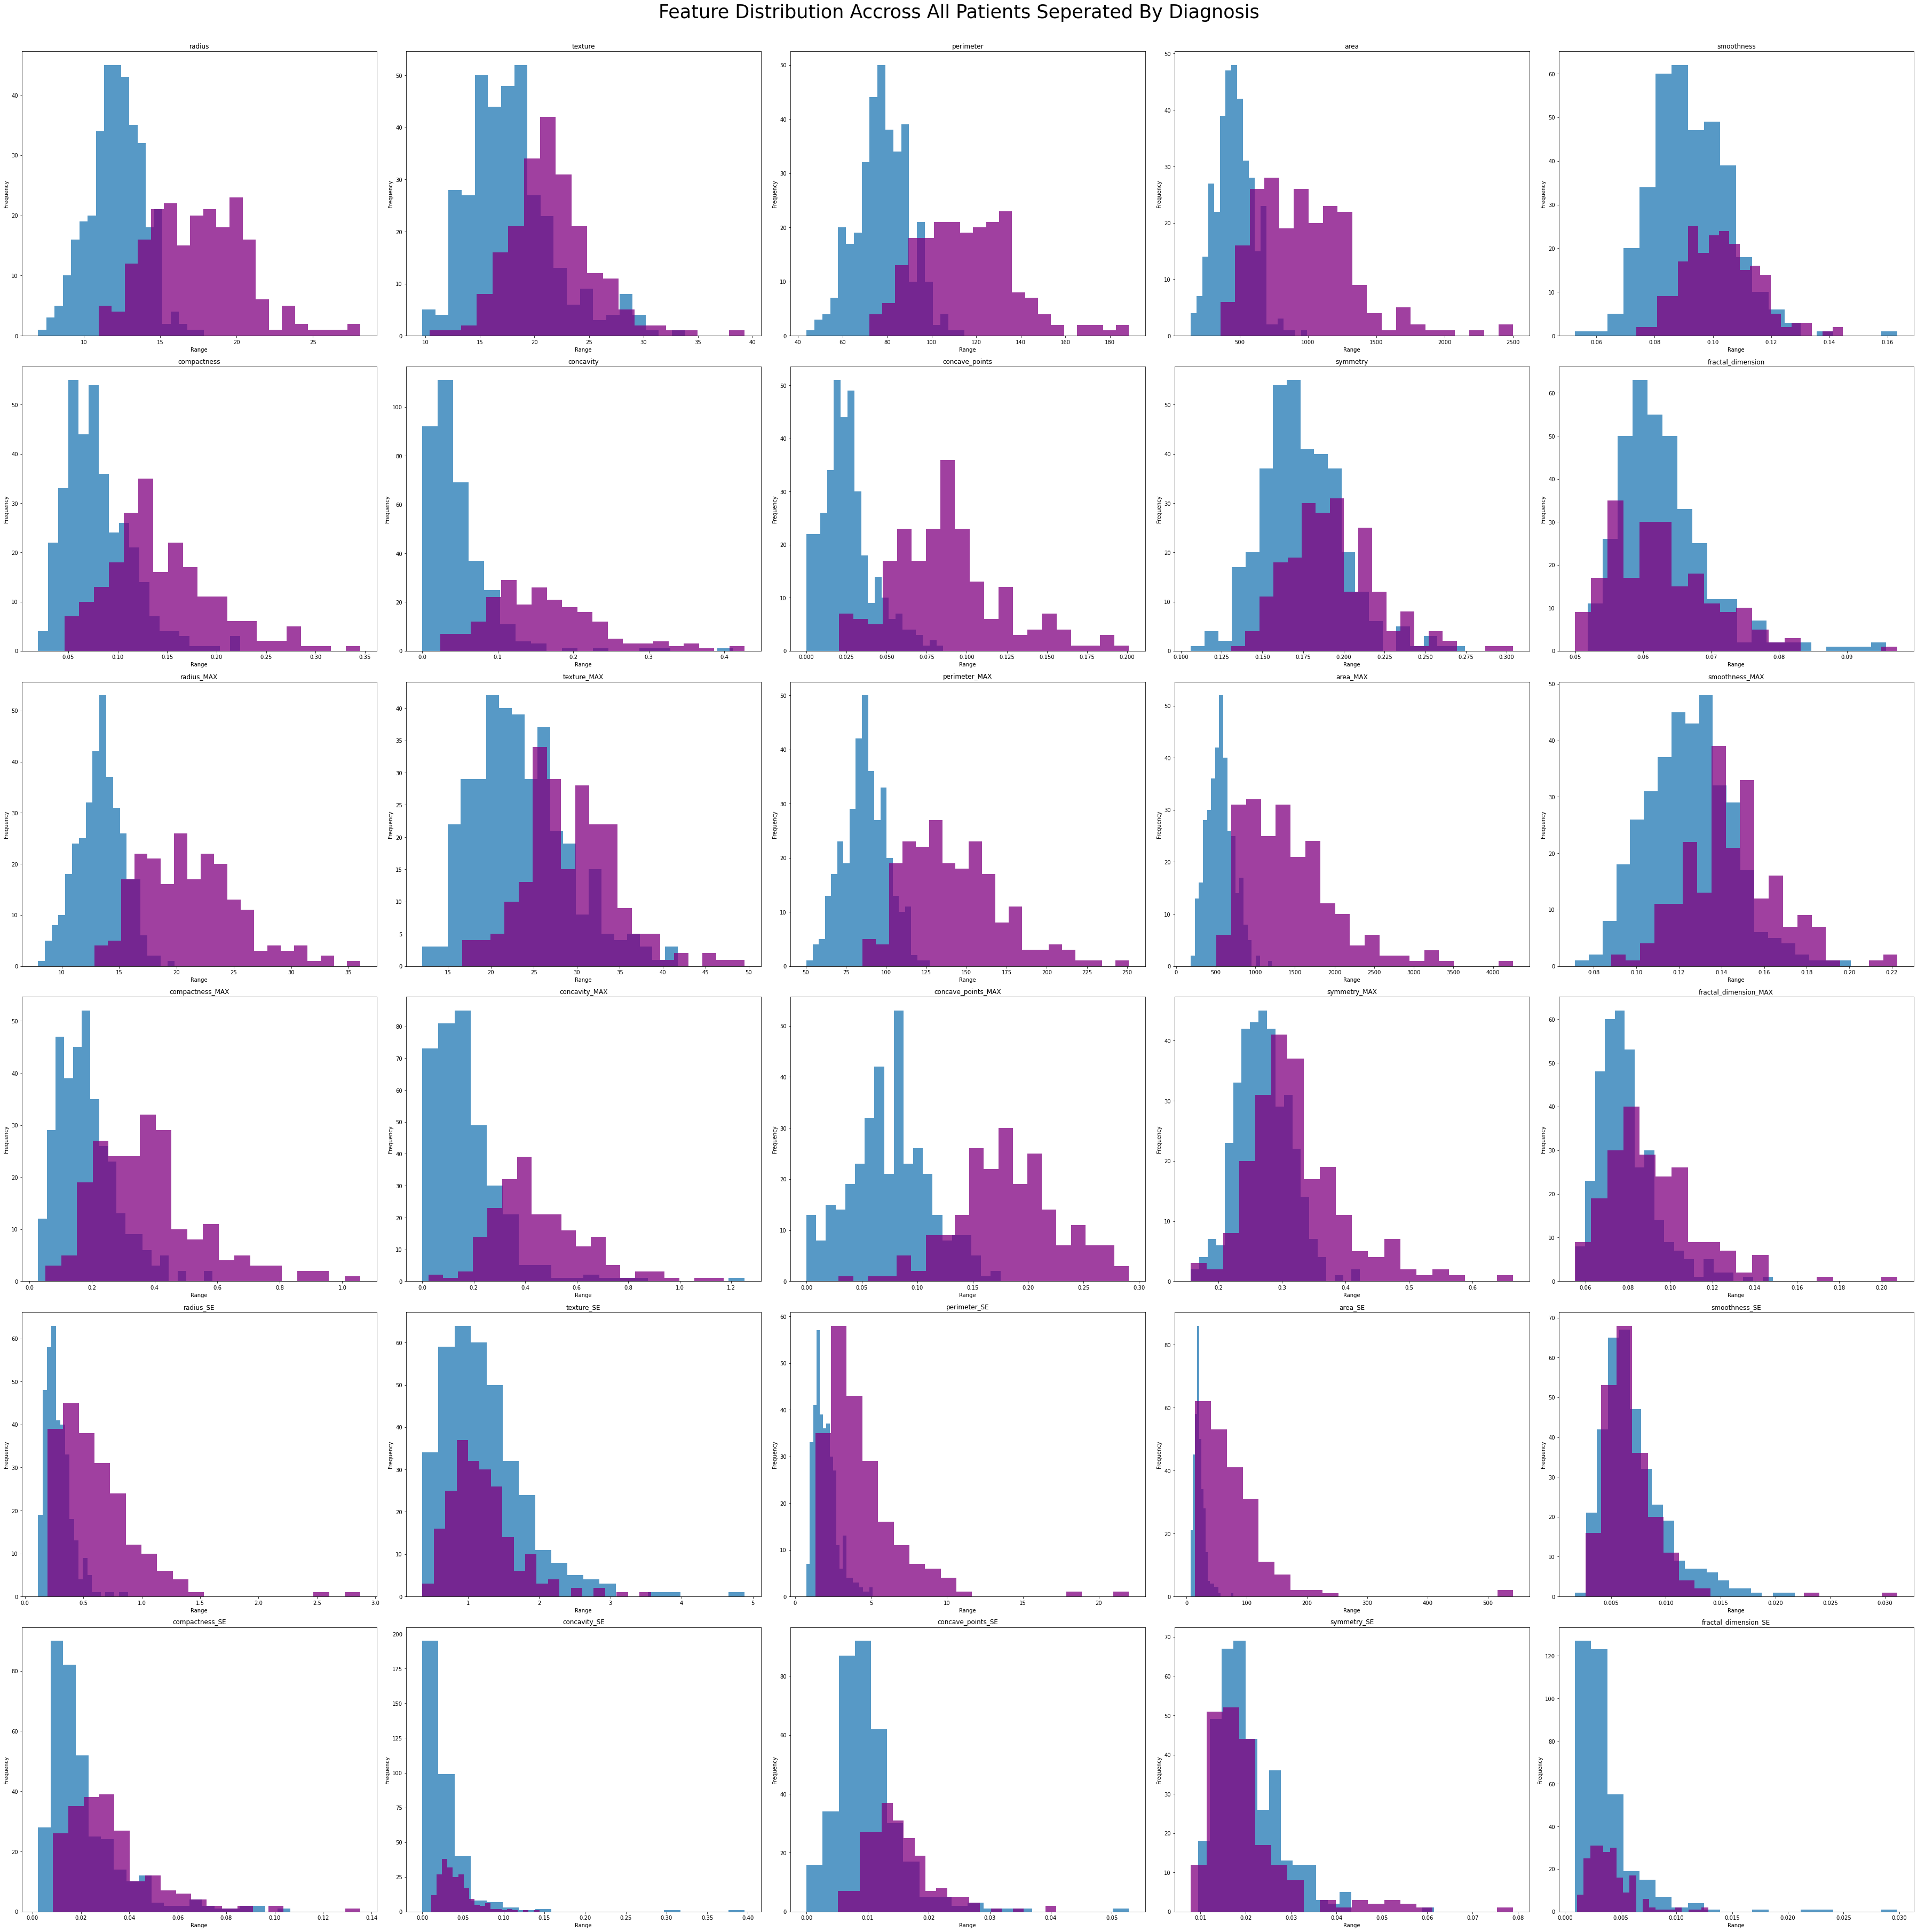

In [5]:
fig, ax = plt.subplots(6, 5, figsize = (50, 50))
colGraphs = cols[2:]
colGraphs = colGraphs[:10] + colGraphs[20:] + colGraphs[10:20]
plt.suptitle('Feature Distribution Accross All Patients Seperated By Diagnosis', fontsize=35, y=1.005)
counter = 0
for i in colGraphs:
    beningHist, benignBins = np.histogram(benignDF[i], bins=20)
    maligHist, maligBins = np.histogram(malignantDF[i], bins=20)
    ax[int(counter / 5), (counter % 5)].hist(benignDF[i], bins = benignBins, alpha = 0.75)
    ax[int(counter / 5), (counter % 5)].hist(malignantDF[i], bins = maligBins, alpha = 0.75, color = 'purple')
    ax[int(counter / 5), (counter % 5)].set_title(i)
    ax[int(counter / 5), (counter % 5)].set_ylabel('Frequency')
    ax[int(counter / 5), (counter % 5)].set_xlabel('Range')
    counter += 1

fig.tight_layout()
plt.show()